## Data Exploration

In [1]:
! pip install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.1 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 64.2 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 92.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 71.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 85.4 MB/s eta 0:00:00:00:0100:01


In [2]:
import os
import sys
import json
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

In [6]:
base_path = "/workspace/data"

os.chdir(base_path)
os.chdir(os.path.join(os.getcwd(),'data_00',"data_00_train_None"))

jf = open("labels.json")
labels = json.load(jf)
lengths = {}
train_l = len(labels['images'])


In [8]:
print(train_l)

11696


In [ ]:
def open_and_count(base_path, dirs):

    lengths = {}

    for dir in dirs:
        
        subdir = {}
        for mod in ["train", "val"]:
            
            #navigate to path
            #os.chdir(base_path)
            os.chdir(os.path.join(base_path, dir, mod))

            #open the label
            jf = open("labels.json")
            labels = json.load(jf)
            subdir[mod] = len(labels['images'])

        
        lengths[dir] = subdir

        lengths[dir]['total'] = lengths[dir]['train'] + lengths[dir]['val']

    return lengths

In [ ]:

if __name__ == "__main__":
    base_path = "/content/drive/MyDrive/hertie_master_projects/raw_data/duke"
    assert not '.' in base_path, ("This is the placeholder path, please"
                                  " configure base_path to the duke data")

    target_base_dir = "/content/drive/MyDrive/hertie_master_projects/datasets"
    assert not '.' in target_base_dir, ("This is the placeholder path, please"
                                        " configure target_base_dir to the dataset path")
    dataset_name = 'testset'

    os.chdir(base_path)
    dirs = [ 
            #'hartford',   #  (APPEARS TO HAVE CORRUPTED GEOJSON FILES)
             'china',
             'kansas',
             'dunedin',
             'gisborne',
             'palmertson',
             'rotorua',
             'tauranga',
             'wilmington',
             'arizona',
             'clyde',
             'sudan',
             'mexico',
             'brazil',
            ]

    dict_with_lens = open_and_count(base_path, dirs)

    

In [ ]:
print(dict_with_lens)

{'china': {'train': 1055, 'val': 272, 'total': 1327}, 'kansas': {'train': 1002, 'val': 377, 'total': 1379}, 'dunedin': {'train': 232, 'val': 25, 'total': 257}, 'gisborne': {'train': 484, 'val': 190, 'total': 674}, 'palmertson': {'train': 429, 'val': 197, 'total': 626}, 'rotorua': {'train': 193, 'val': 61, 'total': 254}, 'tauranga': {'train': 329, 'val': 135, 'total': 464}, 'wilmington': {'train': 462, 'val': 91, 'total': 553}, 'arizona': {'train': 661, 'val': 230, 'total': 891}, 'clyde': {'train': 636, 'val': 663, 'total': 1299}, 'sudan': {'train': 3990, 'val': 1153, 'total': 5143}, 'mexico': {'train': 2223, 'val': 1108, 'total': 3331}, 'brazil': {'train': 118, 'val': 0, 'total': 118}}


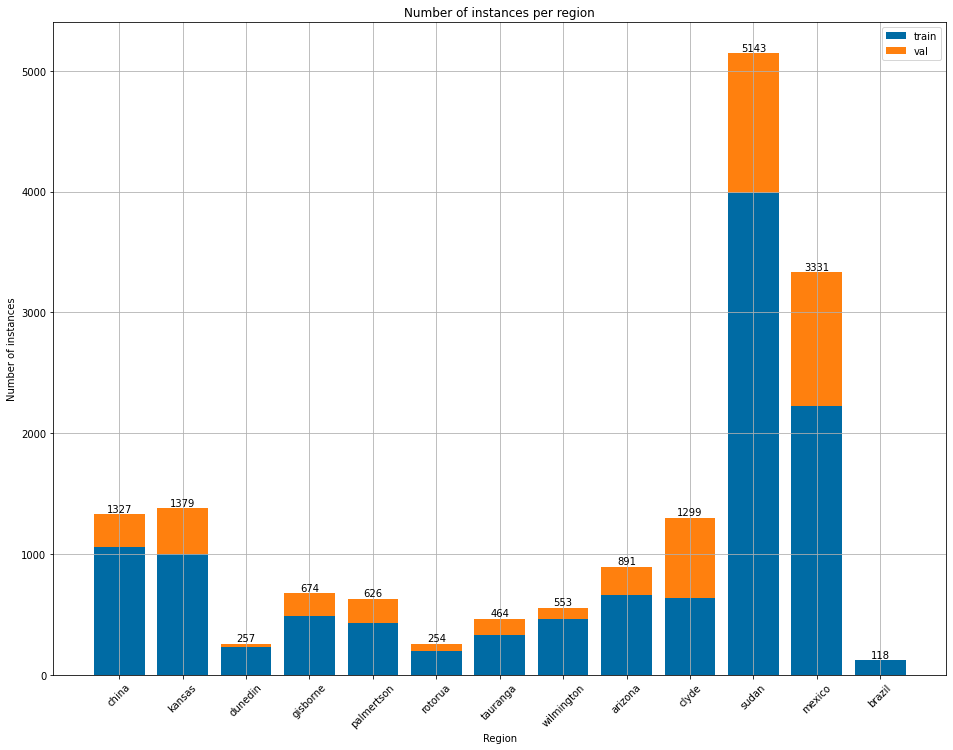

In [ ]:
import matplotlib.pyplot as plt

dictionary = dict_with_lens

plt.figure(figsize = (16,12))
plt.style.use("tableau-colorblind10")

# Extract the values for each category
train_values = [dict_with_lens[region]['train'] for region in dict_with_lens]
val_values = [dict_with_lens[region]['val'] for region in dict_with_lens]
total_values = [dict_with_lens[region]['total'] for region in dict_with_lens]

# Extract the region names
region_names = list(dict_with_lens.keys())

# Set the position of the bars on the x-axis
x_pos = range(len(region_names))

# Build the bar plot
plt.bar(x_pos, train_values, label='train')
plt.bar(x_pos, val_values, bottom=train_values, label='val')

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Number of instances')
plt.title('Number of instances per region')
plt.grid()

# Add ticks on the x-axis
plt.xticks(x_pos, region_names, rotation = 45)

# Add the total values on top of the bars
for i, total in enumerate(total_values):
    plt.text(x=i, y=total+20, s=f'{total}', ha='center')

# Show the legend
plt.legend()

# Display the plot
plt.show()

Explore Types of Towers

In [ ]:
base_path = "/content/drive/MyDrive/hertie_master_projects/raw_data/duke"

os.chdir(base_path)
os.chdir(os.path.join(os.getcwd(), 'wilmington', 'train'))

jf = open("labels.json")

In [ ]:
data = json.load(jf)

In [ ]:
data

{'info': {'year': '',
  'version': '',
  'description': 'Exported from FiftyOne',
  'contributor': '',
  'url': 'https://voxel51.com/fiftyone',
  'date_created': '2021-10-16T15:57:07'},
 'licenses': [],
 'categories': [{'id': 0, 'name': 'distribution', 'supercategory': None},
  {'id': 1, 'name': 'transmission', 'supercategory': None}],
 'images': [{'id': 1,
   'file_name': 'WI_97277115912.png',
   'height': 256,
   'width': 256,
   'license': None,
   'coco_url': None},
  {'id': 2,
   'file_name': 'WI_72568340850.png',
   'height': 256,
   'width': 256,
   'license': None,
   'coco_url': None},
  {'id': 3,
   'file_name': 'WI_82575243847.png',
   'height': 256,
   'width': 256,
   'license': None,
   'coco_url': None},
  {'id': 4,
   'file_name': 'WI_38979849958.png',
   'height': 256,
   'width': 256,
   'license': None,
   'coco_url': None},
  {'id': 5,
   'file_name': 'WI_63810417624.png',
   'height': 256,
   'width': 256,
   'license': None,
   'coco_url': None},
  {'id': 6,
   'f

In [ ]:
# function to get the categories out of the annotations
def get_category_ids(list):
    ids = []
    for i in list:
        if i['category_id'] not in ids:
            ids.append(i['category_id'])
    return ids

In [ ]:
def count_instances(list, category_id):
    counter = 0
    for i in list:
        if i['category_id'] == category_id:
            counter += 1
    return counter

In [ ]:
tower_categories = {}

cat = get_category_ids(data["annotations"])

tower_categories["tower_category"] = cat

In [ ]:
tower_categories

{'tower_category': [1, 0]}

In [ ]:
for category in tower_categories["tower_category"]:
  #print(category)
  count = count_instances(data["annotations"],category)
  #print(count)
  tower_categories[category] = count

In [ ]:
tower_categories

{'tower_category': [1, 0], 1: 293, 0: 673}

In [ ]:
def count_tower_type(base_path, dirs):

    lengths = {}

    for dir in dirs:
        
        
        subdir = {}
        for mod in ["train", "val"]:
          #navigate to path
          #os.chdir(base_path)
          os.chdir(os.path.join(base_path, dir, mod))

          #open the label
          jf = open("labels.json")
          labels = json.load(jf)

          try:
            tower_categories = {}
            cat = get_category_ids(labels["annotations"])
            tower_categories["tower_category"] = cat

            for category in tower_categories["tower_category"]:
              count = count_instances(labels["annotations"],category)
              cat_name = labels["categories"][category]["name"]
              tower_categories[cat_name] = count


            subdir[mod] = tower_categories
          
          except:
            print(dir)
        
        lengths[dir] = subdir

    return lengths

In [ ]:
data["categories"]

[{'id': 0, 'name': 'distribution', 'supercategory': None},
 {'id': 1, 'name': 'transmission', 'supercategory': None}]

In [ ]:
os.chdir(base_path)
dirs = [ 
            #'hartford',   #  (APPEARS TO HAVE CORRUPTED GEOJSON FILES)
             'china',
             'kansas',
             'dunedin',
             'gisborne',
             'palmertson',
             'rotorua',
             'tauranga',
             'wilmington',
             'arizona',
             'clyde',
             'sudan',
             'mexico',
             #'brazil',
            ]

dict_with_counts = count_tower_type(base_path, dirs)

In [ ]:
dict_with_counts

{'china': {'train': {'tower_category': [0, 1],
   'distribution': 3686,
   'transmission': 812},
  'val': {'tower_category': [0, 1], 'distribution': 1327, 'transmission': 82}},
 'kansas': {'train': {'tower_category': [0, 1],
   'distribution': 2772,
   'transmission': 253},
  'val': {'tower_category': [0, 1], 'distribution': 1253, 'transmission': 34}},
 'dunedin': {'train': {'tower_category': [1, 0],
   'transmission': 47,
   'distribution': 842},
  'val': {'tower_category': [1, 0], 'transmission': 2, 'distribution': 52}},
 'gisborne': {'train': {'tower_category': [0, 1],
   'distribution': 1504,
   'transmission': 32},
  'val': {'tower_category': [0], 'distribution': 526}},
 'palmertson': {'train': {'tower_category': [1, 0],
   'transmission': 126,
   'distribution': 1077},
  'val': {'tower_category': [1, 0], 'transmission': 292, 'distribution': 394}},
 'rotorua': {'train': {'tower_category': [0, 1],
   'distribution': 598,
   'transmission': 33},
  'val': {'tower_category': [0, 1], '

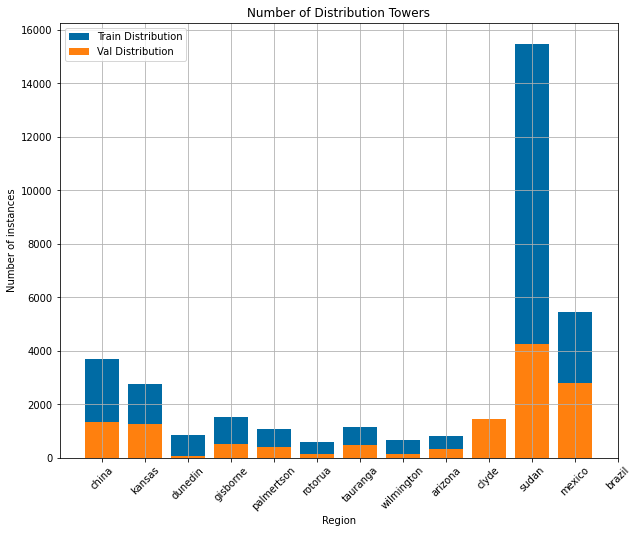

In [ ]:
import matplotlib.pyplot as plt


# Extract the data from the dictionary
countries = []
train_distribution = []
train_transmission = []
val_distribution = []
val_transmission = []

for country, data in dict_with_counts.items():
    countries.append(country)
    train_distribution.append(data['train']['distribution'])
    val_distribution.append(data['val']['distribution'])
    if 'transmission' in data['train']:
        train_transmission.append(data['train']['transmission'])
    else:
        train_transmission.append(0)
    if 'transmission' in data['val']:
        val_transmission.append(data['val']['transmission'])
    else:
        val_transmission.append(0)

# Create the bar chart for distribution towers
fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(countries, train_distribution, label='Train Distribution')
ax.bar(countries, val_distribution, label='Val Distribution')
#ax.bar(countries, train_transmission, label='Train Transmission', bottom=train_distribution)
#ax.bar(countries, val_transmission, label='Val Transmission', bottom=val_distribution)

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Number of instances')
plt.title('Number of Distribution Towers')
plt.grid()

# Add ticks on the x-axis
plt.xticks(x_pos, region_names, rotation = 45)

# Add a legend and show the plot
ax.legend()
plt.show()


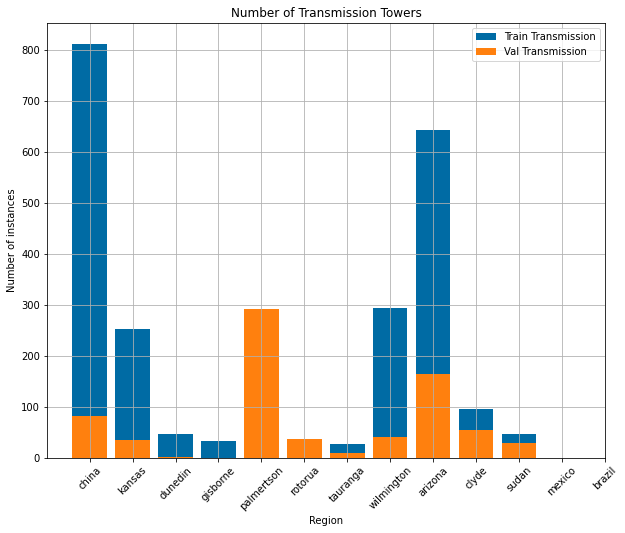

In [ ]:
# Create the bar chart for transmission towers
fig, ax = plt.subplots(figsize=(10, 8))
#ax.bar(countries, train_distribution, label='Train Distribution')
#ax.bar(countries, val_distribution, label='Val Distribution')
ax.bar(countries, train_transmission, label='Train Transmission')
ax.bar(countries, val_transmission, label='Val Transmission')

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Number of instances')
plt.title('Number of Transmission Towers')
plt.grid()

# Add ticks on the x-axis
plt.xticks(x_pos, region_names, rotation = 45)

# Add a legend and show the plot
ax.legend()
plt.show()


Explore different File Types (Dinah)

In [ ]:
os.chdir(base_path)
os.chdir(os.path.join(os.getcwd(), 'rotorua', 'raw'))

In [ ]:

test_file = gpd.read_file("NZ_Rotorua_1.geojson")


In [ ]:
test_file.head()

,label,filename,country,city,pixel_coordinates,projection,geometry
0,DT,NZ_Rotorua_1.geojson,NZ,Rotorua,"[ [ 1746.419430466744, 198.8824651099352 ], [ ...","PROJCS[""NZGD2000 / New Zealand Transverse Merc...","POLYGON ((176.12846 -37.71970, 176.12845 -37.7..."
1,DT,NZ_Rotorua_1.geojson,NZ,Rotorua,"[ [ 1432.9454065123032, 734.37763432560564 ], ...","PROJCS[""NZGD2000 / New Zealand Transverse Merc...","POLYGON ((176.12800 -37.72058, 176.12799 -37.7..."
2,DT,NZ_Rotorua_1.geojson,NZ,Rotorua,"[ [ 1464.3479010033457, 936.01470421545685 ], ...","PROJCS[""NZGD2000 / New Zealand Transverse Merc...","POLYGON ((176.12805 -37.72091, 176.12807 -37.7..."
3,DT,NZ_Rotorua_1.geojson,NZ,Rotorua,"[ [ 1391.0754138575801, 866.04774280559047 ], ...","PROJCS[""NZGD2000 / New Zealand Transverse Merc...","POLYGON ((176.12794 -37.72080, 176.12796 -37.7..."
4,DL,NZ_Rotorua_1.geojson,NZ,Rotorua,"[ [ 1475.2175714648938, 942.59270042989601 ], ...","PROJCS[""NZGD2000 / New Zealand Transverse Merc...","MULTILINESTRING ((176.12806 -37.72093, 176.128..."


In [ ]:
test_file.shape

(67, 7)

In [ ]:
test_file['geometry']
# i am not able to plot the geometries of the rotorua file and i dont get why

0     POLYGON ((176.12846 -37.71970, 176.12845 -37.7...
1     POLYGON ((176.12800 -37.72058, 176.12799 -37.7...
2     POLYGON ((176.12805 -37.72091, 176.12807 -37.7...
3     POLYGON ((176.12794 -37.72080, 176.12796 -37.7...
4     MULTILINESTRING ((176.12806 -37.72093, 176.128...
                            ...                        
62    MULTILINESTRING ((176.12854 -37.72571, 176.128...
63    POLYGON ((176.12988 -37.72362, 176.12986 -37.7...
64    POLYGON ((176.13012 -37.72322, 176.13011 -37.7...
65    POLYGON ((176.12875 -37.72571, 176.12874 -37.7...
66    MULTILINESTRING ((176.12870 -37.72571, 176.128...
Name: geometry, Length: 67, dtype: geometry

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [ ]:
newz = world.loc[world['name'] == 'New Zealand']
new_z_bound = newz['geometry']

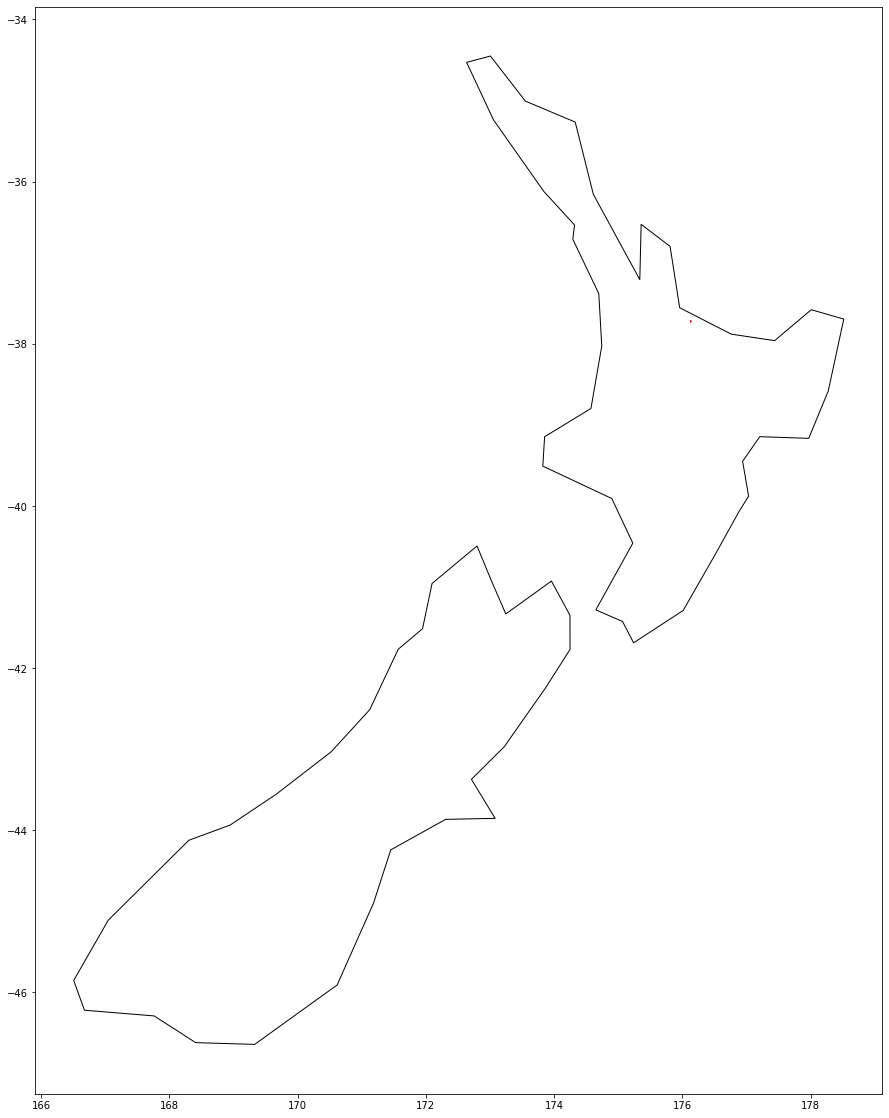

In [ ]:
fig, ax = plt.subplots(figsize=(30,20))

ax.set_aspect('equal')

new_z_bound.plot(ax=ax, color='white', edgecolor='black')


test_file.plot(ax=ax, color='red', edgecolor="red")

plt.show()

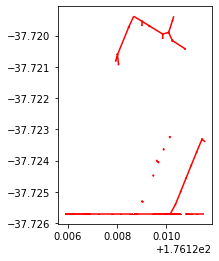

In [ ]:
test_file.plot(color='red', edgecolor="red")

136    MULTIPOLYGON (((176.88582 -40.06598, 176.50802...
Name: geometry, dtype: geometry

Checking out the TIF files

In [ ]:
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 56.0 MB/s eta 0:00:00


In [ ]:
import rasterio
from rasterio.plot import show

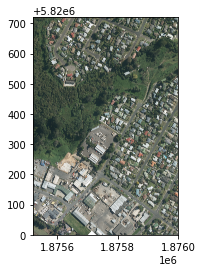

In [ ]:
fp = r'NZ_Rotorua_1.tif'
img = rasterio.open(fp)
show(img)

In [ ]:
print(img.count)
print(img.height)
print(img.width)
print(img.crs)

4
5760
3840
EPSG:2193


In [ ]:
# check out npz file

In [ ]:
from numpy import load

npz_file = load('NZ_Rotorua_1.npz')

In [ ]:
from PIL import Image

In [ ]:
data = np.load('NZ_Rotorua_1.npz')
print(data.files)
image = data['arr_0']
img = Image.fromarray(image)

['arr_0']


In [ ]:
data['arr_0'][400]

array([0., 0., 0., ..., 0., 0., 0.])

Data Inspection after duke_data_extraction

In [ ]:
base_path = "/content/drive/MyDrive/hertie_master_projects/testtest"

os.chdir(base_path)

In [ ]:
os.chdir(os.path.join(os.getcwd(), 'testtest_train_0.4'))

jf = open("labels.json")
labels = json.load(jf)
annots = labels['annotations']

In [ ]:
df = pd.DataFrame.from_dict(annots)

In [ ]:
df.head()

,id,image_id,category_id,bbox,area,iscrowd
0,1,1,0,"[49.91293684855916, 2.825260576333538, 9.10361...",82.875850,0
1,2,1,0,"[122.42795830778664, 70.63151440833845, 10.359...",107.314864,0
2,3,1,0,"[189.9202942979767, 130.5898221949724, 9.73145...",88.591426,0
3,4,1,0,"[261.49356223175965, 197.76824034334763, 11.30...",127.713557,0
4,5,1,0,"[329.92765174739424, 258.982219497241, 10.6732...",107.216320,0


In [ ]:
image_id_counts = df['image_id'].value_counts()

In [ ]:
image_id_counts = image_id_counts.sort_index()

# Convert the result to a DataFrame
towers_per_image = pd.DataFrame({'value': image_id_counts.index, 'count': image_id_counts.values})

# Print the result
print(towers_per_image)

    value  count
0       1      9
1       2      8
2       3      9
3       4      6
4       5      8
..    ...    ...
56     57      2
57     58      4
58     59      7
59     60      7
60     61      7

[61 rows x 2 columns]


In [ ]:
overview_counts = towers_per_image['count'].value_counts()

In [ ]:
overview_counts.sort_index()

2      3
3      3
4      5
5      4
6      7
7     11
8      6
9      6
10     3
11     9
12     2
13     2
Name: count, dtype: int64

In [ ]:
dirs = [
    'testtest_train_0.2',
    'testtest_train_0.4',
    'testtest_train_0.6',
    'testtest_val_0.2',
    'testtest_val_0.4',
    'testtest_val_0.6'
    ]

In [ ]:
base_path = "/content/drive/MyDrive/hertie_master_projects/testtest"

os.chdir(base_path)
print(base_path)

/content/drive/MyDrive/hertie_master_projects/testtest


In [ ]:
os.getcwd()

'/content/drive/.shortcut-targets-by-id/19wmeIrYff6SGZ5EoznAhaID34inh-qWh/hertie_master_projects/testtest'

In [ ]:
tower_counts = []

for dir in dirs:

  #navigate to path
  os.chdir(os.path.join(base_path, dir))
  os.getcwd()
  #open annotations dict
  jf = open("labels.json")
  labels = json.load(jf)
  annots = labels['annotations']

  #convert to pandas df
  df = pd.DataFrame.from_dict(annots)

  image_id_counts = df['image_id'].value_counts()
  image_id_counts = image_id_counts.sort_index()

  # Convert the result to a DataFrame
  towers_per_image = pd.DataFrame({'image': image_id_counts.index, 'tower_count': image_id_counts.values})

  tower_counts.append(towers_per_image)


In [ ]:
train_tower_counts = tower_counts[:3]
val_tower_counts = tower_counts[3:]

In [ ]:
tower_counts

[     image  tower_count
 0        1            3
 1        2            4
 2        3            2
 3        4            5
 4        5            5
 ..     ...          ...
 188    189            2
 189    190            2
 190    191            2
 191    192            1
 192    193            1
 
 [193 rows x 2 columns],      image  tower_count
 0        1            6
 1        2            8
 2        3            3
 3        4            3
 4        5            5
 ..     ...          ...
 188    189            5
 189    190            2
 190    191            2
 191    192            3
 192    193            1
 
 [193 rows x 2 columns],      image  tower_count
 0        1           14
 1        2            9
 2        3            7
 3        4           10
 4        5           10
 ..     ...          ...
 188    189            6
 189    190            6
 190    191            4
 191    192            7
 192    193            5
 
 [193 rows x 2 columns],     image  tower_coun

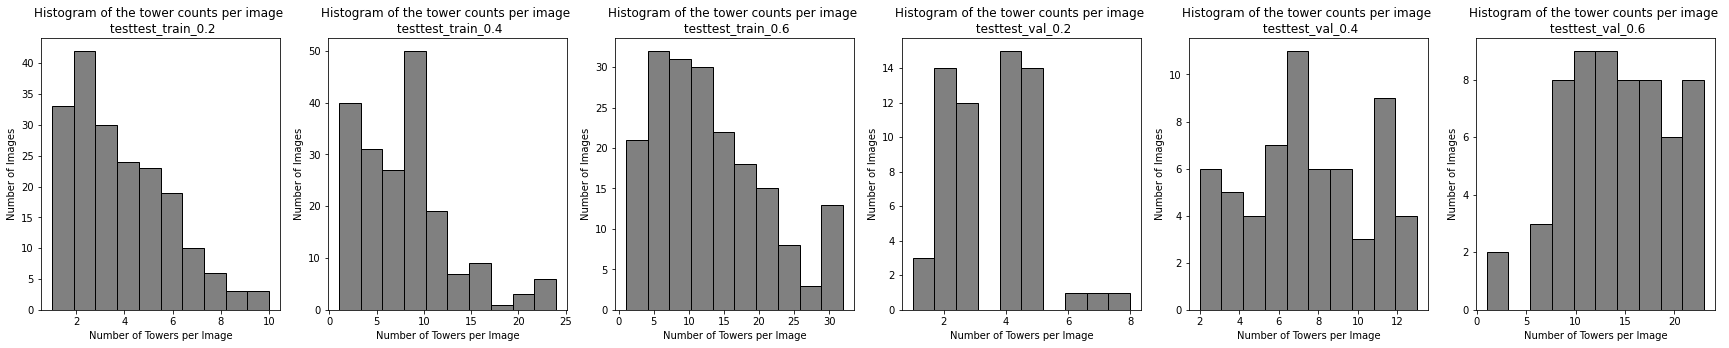

In [ ]:
fig, ax = plt.subplots(figsize=(30,5))

for i, df in enumerate(tower_counts):
    plt.subplot(1, len(tower_counts), i + 1)
    plt.hist(df.iloc[:, 1], bins=10, edgecolor='black', facecolor='grey') 
    plt.title(f"Histogram of the tower counts per image \n {dirs[i]}")
    plt.xlabel("Number of Towers per Image")
    plt.ylabel("Number of Images")

# Show the plot
plt.show()



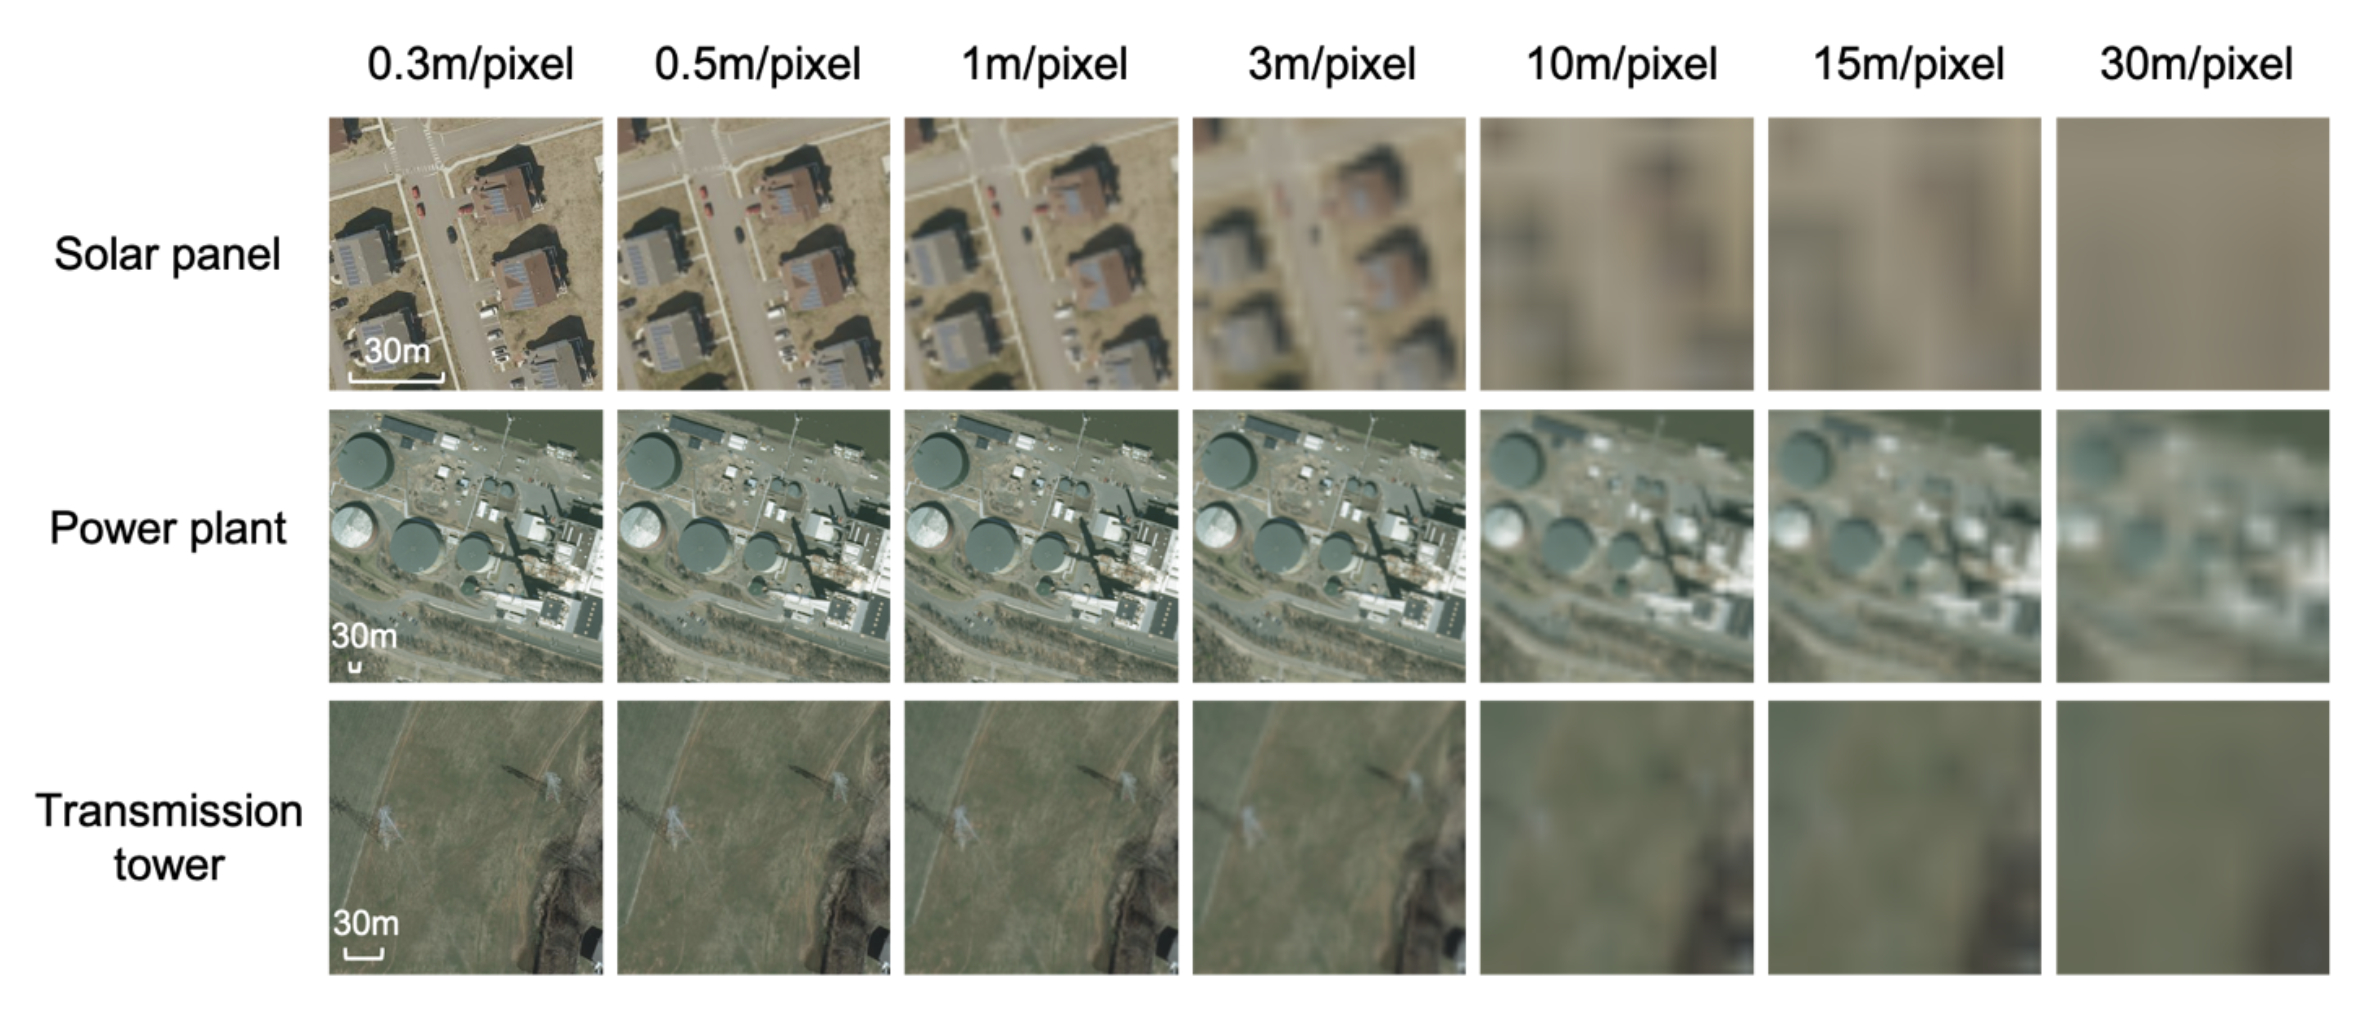